# Bicycle store - Data analysis

Author: Y. Staeva

This project is focused on Exploratory data analysis.

The data used for this project is available at:

Link: https://github.com/ine-rmotr-curriculum

This project is for educational purposes only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read the dataset**

In [2]:
store_data = pd.read_csv('/content/drive/MyDrive/sales_data.csv')

**Have a look at the data**

In [3]:
store_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

### Data cleansing

**Check for missing values**

In [5]:
store_data.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

**Check missing categorical values**

In [6]:
store_data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

**Check for duplicate values**

In [7]:
store_data.duplicated().sum()

1000

**Remove duplicated rows**

In [8]:
store_data = store_data.drop_duplicates(keep='first')

In [9]:
store_data.shape

(112036, 18)

**Check column values**

In [10]:
store_data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

**Check customer age values**

In [11]:
store_data['Customer_Age'].unique()

array([19, 49, 47, 35, 32, 34, 29, 51, 48, 43, 61, 57, 38, 52, 24, 23, 26,
       54, 46, 41, 33, 42, 45, 53, 21, 22, 67, 31, 37, 87, 25, 40, 44, 55,
       50, 59, 17, 27, 28, 36, 56, 58, 30, 18, 62, 39, 64, 63, 20, 60, 84,
       68, 65, 73, 69, 66, 75, 76, 78, 71, 72, 82, 86, 77, 74, 85, 81, 80,
       70, 79])

### Data Analysis

**Check descriptive statistics of data**

In [12]:
store_data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


**See correlation matrix for numerical values**

In [13]:
correlation = store_data.corr()

([<matplotlib.axis.YTick at 0x7fc85333b210>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Cost'),
  Text(0, 0, 'Revenue')])

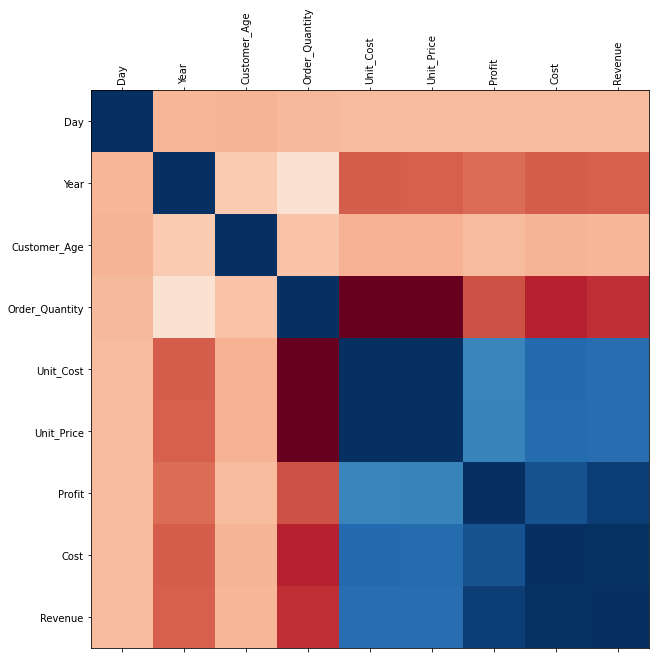

In [14]:
matrix = plt.figure(figsize=(10,10))
plt.matshow(correlation, cmap='RdBu', fignum=matrix.number)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation='vertical')
plt.yticks(range(len(correlation.columns)), correlation.columns)

**Plot the proportion of male and female customers**

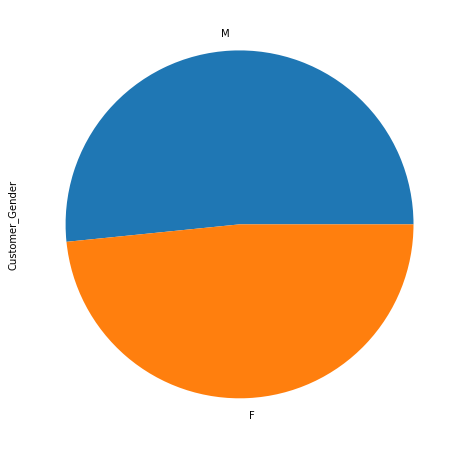

In [15]:
store_data['Customer_Gender'].value_counts().plot(kind='pie', figsize=(8,8))

**Plot customers by age group**

Text(0, 0.5, 'Customers by age group')

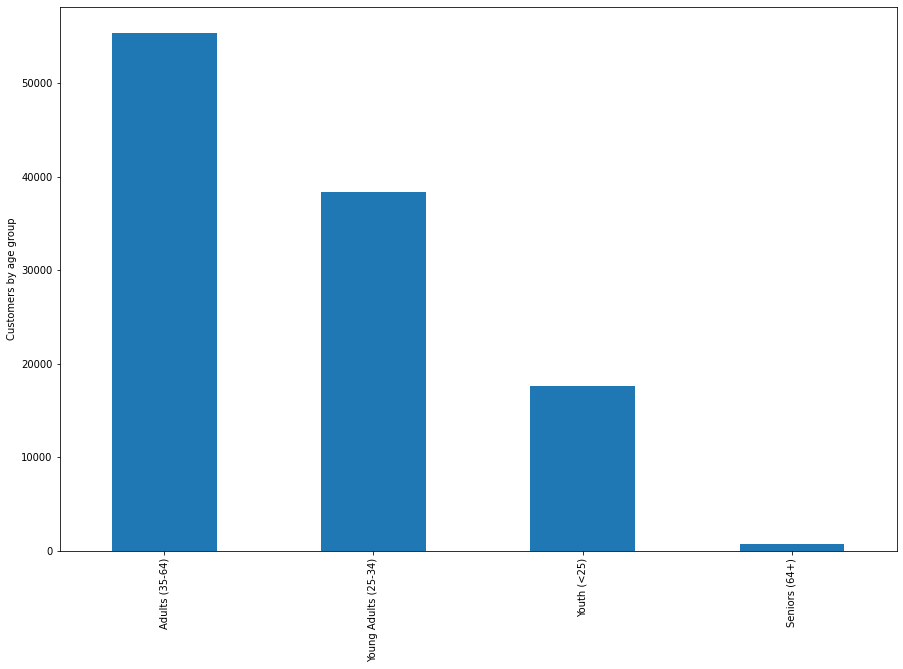

In [16]:
bar_chart = store_data['Age_Group'].value_counts().plot(kind='bar', figsize=(15,10))
bar_chart.set_ylabel('Customers by age group')

**Plot density of customer age**

In [17]:
store_data['Customer_Age'].describe()

count    112036.000000
mean         35.919508
std          11.016543
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: Customer_Age, dtype: float64

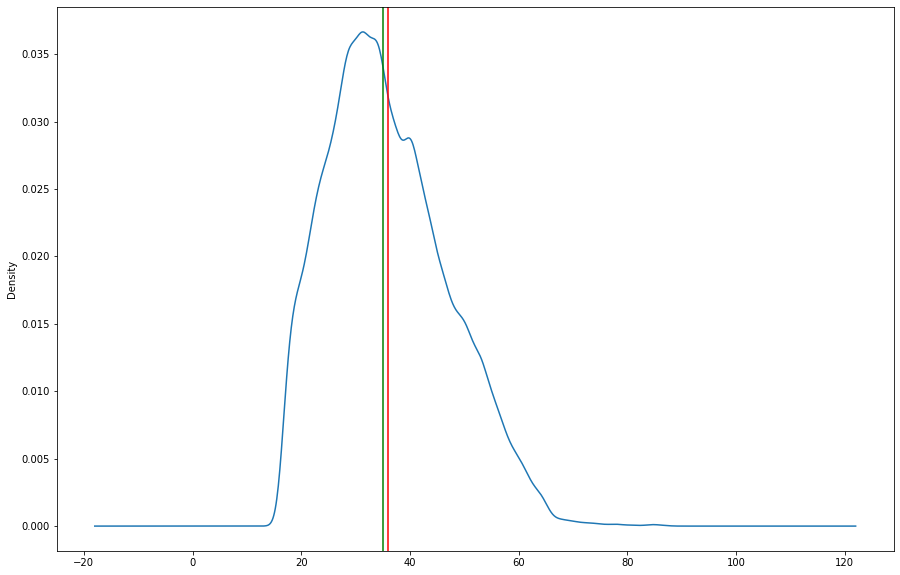

In [18]:
cost_density = store_data['Customer_Age'].plot(kind='density', figsize=(15,10))
cost_density.axvline(store_data['Customer_Age'].mean(), color='red')
cost_density.axvline(store_data['Customer_Age'].median(), color='green')

**Plot sales by state**

Text(0, 0.5, 'Sales by state')

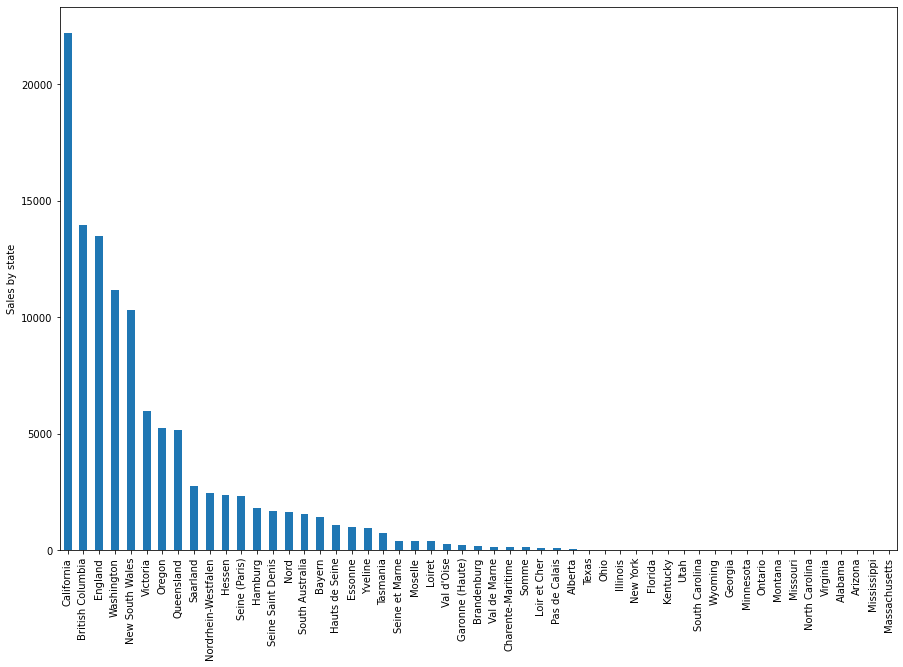

In [19]:
sales_chart = store_data['State'].value_counts().plot(kind='bar', figsize=(15,10))
sales_chart.set_ylabel('Sales by state')

**Plot product sales**

Text(0, 0.5, 'Product sales by category')

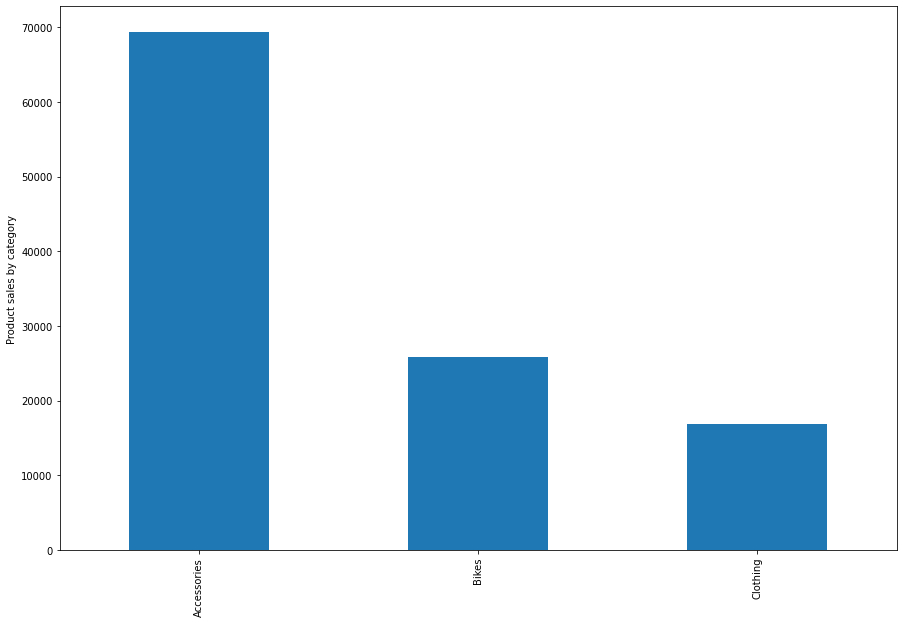

In [20]:
product_sales = store_data['Product_Category'].value_counts().plot(kind='bar', figsize=(15,10))
product_sales.set_ylabel('Product sales by category')

**See unit price, year and profit distribution**

In [21]:
store_data['Unit_Price'].describe()

count    112036.000000
mean        453.850628
std         922.751848
min           2.000000
25%           5.000000
50%          25.000000
75%          70.000000
max        3578.000000
Name: Unit_Price, dtype: float64

In [22]:
store_data['Year'].describe()

count    112036.000000
mean       2014.400925
std           1.273327
min        2011.000000
25%        2013.000000
50%        2014.000000
75%        2016.000000
max        2016.000000
Name: Year, dtype: float64

In [23]:
store_data['Profit'].describe()

count    112036.000000
mean        286.035194
std         454.852634
min         -30.000000
25%          29.000000
50%         103.000000
75%         360.000000
max       15096.000000
Name: Profit, dtype: float64

In [24]:
box_columns = ['Unit_Price', 'Year', 'Profit']

Unit_Price       AxesSubplot(0.125,0.125;0.227941x0.755)
Year          AxesSubplot(0.398529,0.125;0.227941x0.755)
Profit        AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

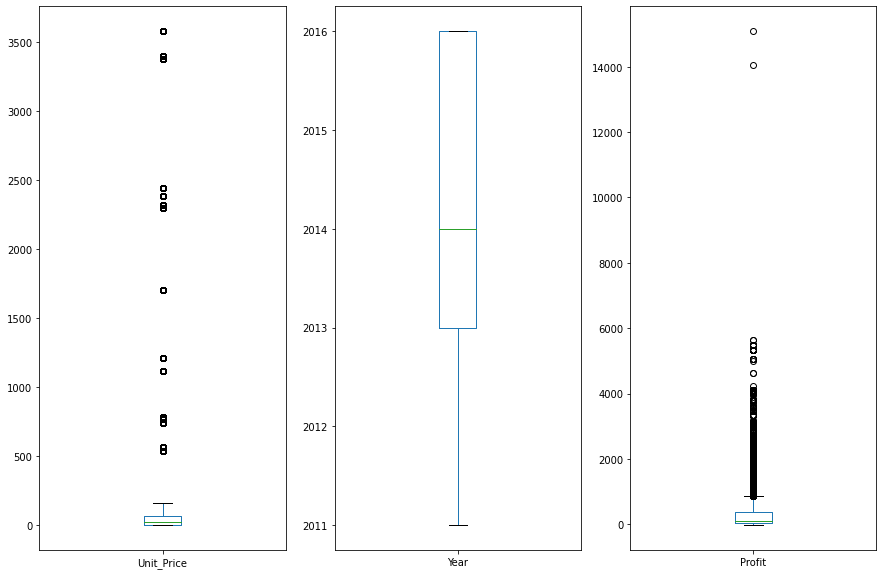

In [25]:
store_data[box_columns].plot(kind='box', vert=True, subplots = True, figsize=(15,10))

**Plot the relationship between customer age and order quantity**

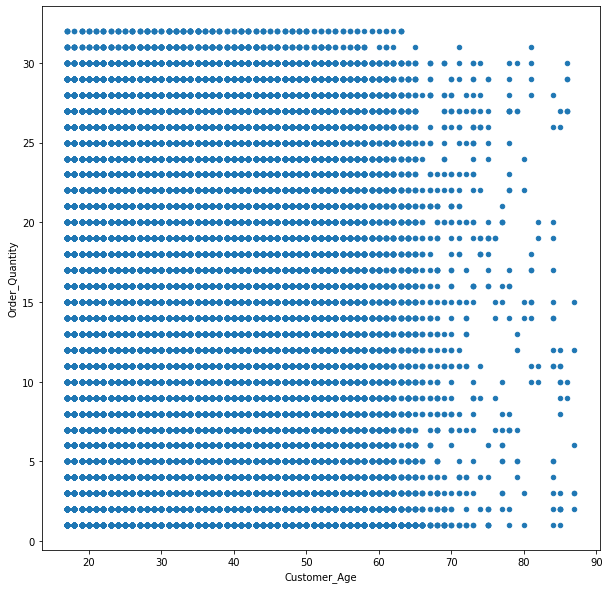

In [26]:
store_data.plot(kind='scatter', x='Customer_Age', y='Order_Quantity', figsize=(10,10))

**Plot the relationship between customer age group and profit**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Profit')

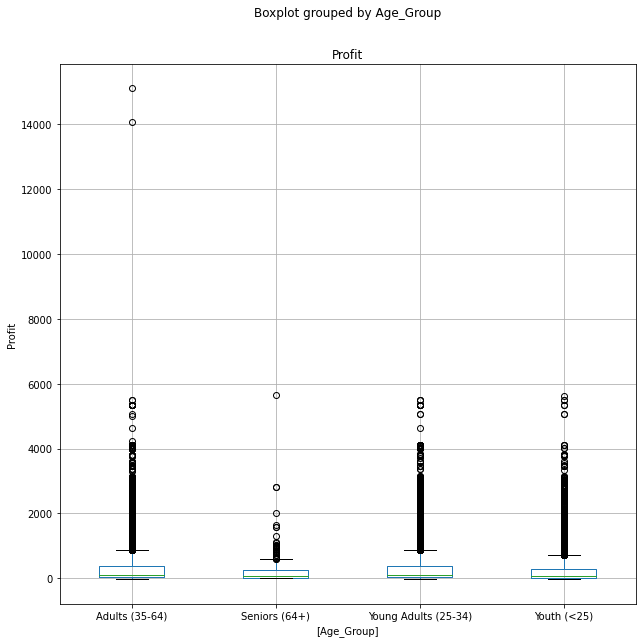

In [27]:
box_plot = store_data[['Age_Group', 'Profit']].boxplot(by = 'Age_Group', figsize=(10,10))
box_plot.set_ylabel('Profit')